Alex Albaugh.  Wayne State.  CHE 5995/7507.  Lecture 20.  Winter 2026.

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

# Principal Component Analysis (PCA)

In [2]:
#load data set for chemical elements
elements_df = pd.read_csv('https://raw.githubusercontent.com/albaugh/CHE7507/refs/heads/main/Lecture20/elements.csv')

elements_df.head()

,AtomicNumber,Symbol,Name,OxidationStates,StandardState,GroupBlock,YearDiscovered,OxidationStates.1,ElectronConfiguration,AtomicMass,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,MeltingPoint,BoilingPoint,Density
0,1,H,Hydrogen,"+1, -1",Gas,Nonmetal,1766,"+1, -1",1s1,1.008000,2.20,120,13.598,0.754,13.81,20.28,0.000090
1,2,He,Helium,0,Gas,Noble gas,1868,0,1s2,4.002600,0.00,140,24.587,0.000,0.95,4.22,0.000179
2,3,Li,Lithium,1,Solid,Alkali metal,1817,1,[He]2s1,7.000000,0.98,182,5.392,0.618,453.65,1615.00,0.534000
3,4,Be,Beryllium,2,Solid,Alkaline earth metal,1798,2,[He]2s2,9.012183,1.57,153,9.323,0.000,1560.00,2744.00,1.850000
4,5,B,Boron,3,Solid,Metalloid,1808,3,[He]2s2 2p1,10.810000,2.04,192,8.298,0.277,2348.00,4273.00,2.370000


In [3]:
#select our features- the numerical features AtomicMass, Electronegativity, AtomicRadius, IonizationEnergy, ElectronAffinity, MeltingPoint, BoilingPoint, Density
cols = list(elements_df.columns)
features = cols[cols.index('AtomicMass'):cols.index('Density') + 1]

#build the feature matrix
X = elements_df[features]

#standardize the features- necessary for PCA
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
#make a PCA object and perform PCA on the scaled features
pca = sklearn.decomposition.PCA()
PCs = pca.fit_transform(X_scaled)

Once the PCA has been fit we can access each principal component's contribution to the overall variance in the data using <code>explained_variance_ratio_</code>.

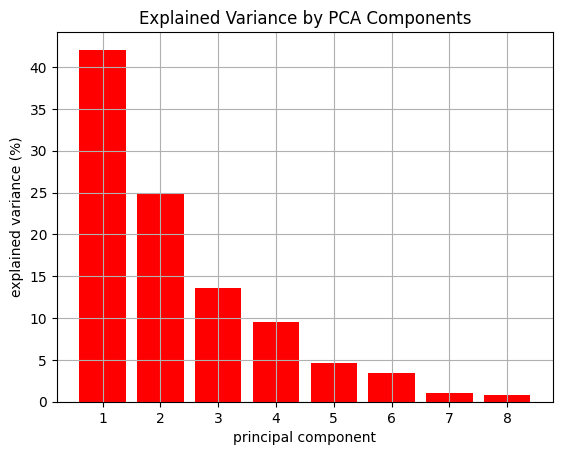

In [5]:
#explained variance plot gives the fraction of variance explained by each principal component
fig1,ax1 = plt.subplots()
ax1.bar(range(1, len(pca.explained_variance_ratio_)+1), 100.0*pca.explained_variance_ratio_, color='r')
ax1.set_xlabel('principal component')
ax1.set_ylabel('explained variance (%)')
ax1.set_title('Explained Variance by PCA Components')
ax1.grid()
plt.show()

In [6]:
#project the data onto PC1 and PC2
#pca = sklearn.decomposition.PCA(n_components=2)
#PCs = pca.fit_transform(X_scaled)

Let's plot the first and second principal components, $\mathrm{PC_2}$ vs. $\mathrm{PC_1}$.  This is our projection of the data onto 2 dimensions.

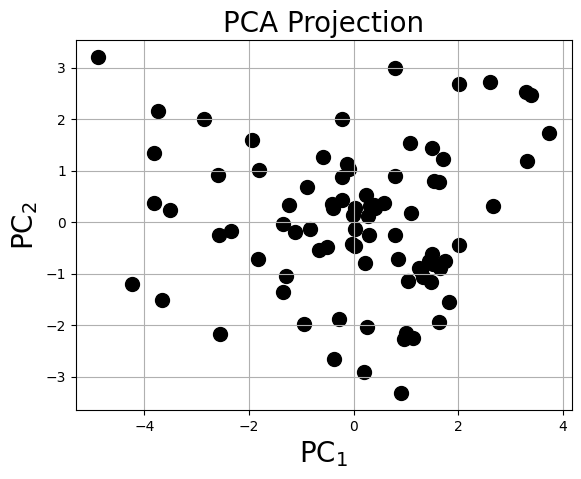

In [7]:
fig2,ax2 = plt.subplots()

#the first and second columns of our output from PCA are the first and second principal components
ax2.scatter(PCs[:, 0], PCs[:, 1], s=100, color='k') #plot PC2 vs PC1

ax2.set_xlabel('$\\mathrm{PC_{1}}$',fontsize=20)
ax2.set_ylabel('$\\mathrm{PC_{2}}$',fontsize=20)
ax2.set_title('PCA Projection',fontsize=20)
ax2.grid()
plt.show()

Now let's look at this PCA projection where we color the data points by their group in the perioid table.

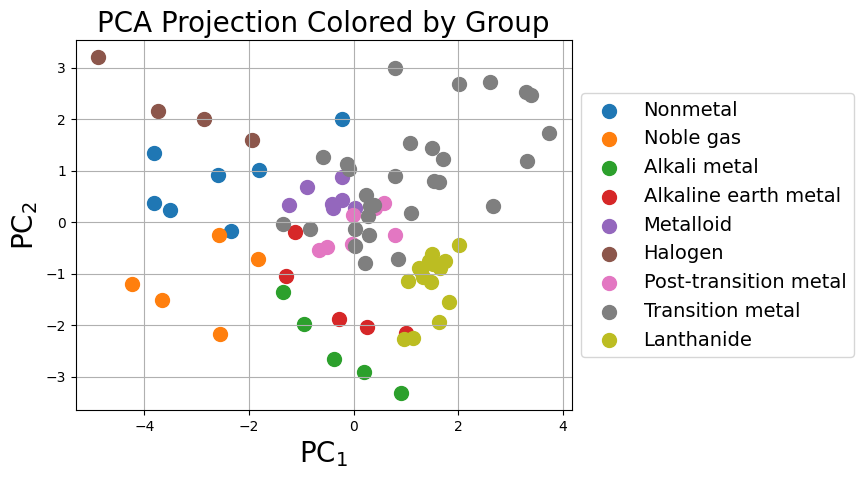

In [8]:
#plot the projected data colored by the periodic table group
categories = elements_df['GroupBlock'].unique() #get the unique labels in the 'GroupBlock'
colors = plt.cm.tab10.colors[:len(categories)] #set up a color for each unique label

fig3,ax3 = plt.subplots()
for cat, col in zip(categories, colors): #loop over all of the unique labels
    indices = (elements_df['GroupBlock'] == cat).values #get all of the data points with this label
    ax3.scatter(PCs[indices, 0], PCs[indices, 1], s=100, label=cat, color=col) #plot all of the data points with this label

ax3.set_xlabel('$\\mathrm{PC_{1}}$',fontsize=20)
ax3.set_ylabel('$\\mathrm{PC_{2}}$',fontsize=20)
ax3.set_title('PCA Projection Colored by Group',fontsize=20)
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=14)
ax3.grid()
plt.show()

In this projection we can see that the periodic groups roughly cluster with each other!

Now let's recolor the projection by the state of the elements are standard temperature and pressure.

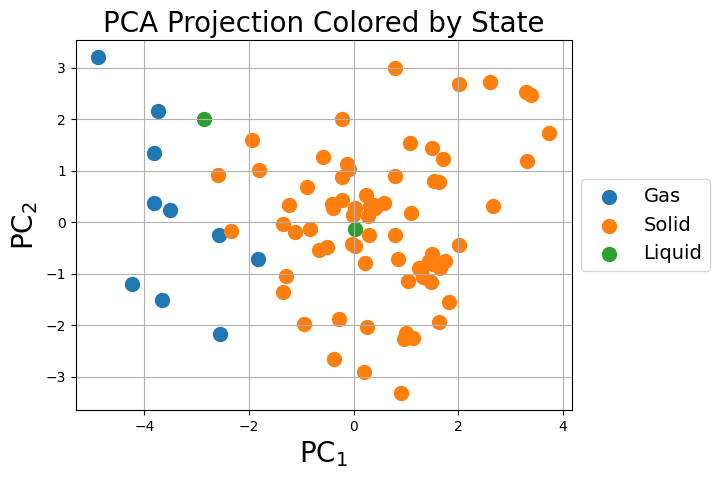

In [9]:
#plot the projected data colored by the state at standard temperature and pressure
categories = elements_df['StandardState'].unique() #get the unique labels in the 'StandardState'
colors = plt.cm.tab10.colors[:len(categories)] #set up a color for each unique label

fig3,ax3 = plt.subplots()
for cat, col in zip(categories, colors): #loop over all of the unique labels
    indices = (elements_df['StandardState'] == cat).values #get all of the data points with this label
    ax3.scatter(PCs[indices, 0], PCs[indices, 1], s=100, label=cat, color=col) #plot all of the data points with this label

ax3.set_xlabel('$\\mathrm{PC_{1}}$',fontsize=20)
ax3.set_ylabel('$\\mathrm{PC_{2}}$',fontsize=20)
ax3.set_title('PCA Projection Colored by State',fontsize=20)
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=14)
ax3.grid()
plt.show()

The gases and liquids also cluster together!

In the fitted PCA object the <code>components_</code> give the principal component vectors.  We can square the elements of these vectors and normalize by the sum of the squares to determine how much each feature contributes to a given principal component.

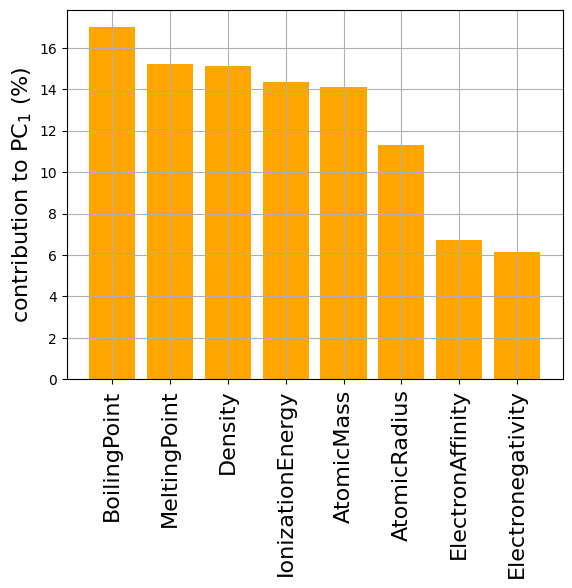

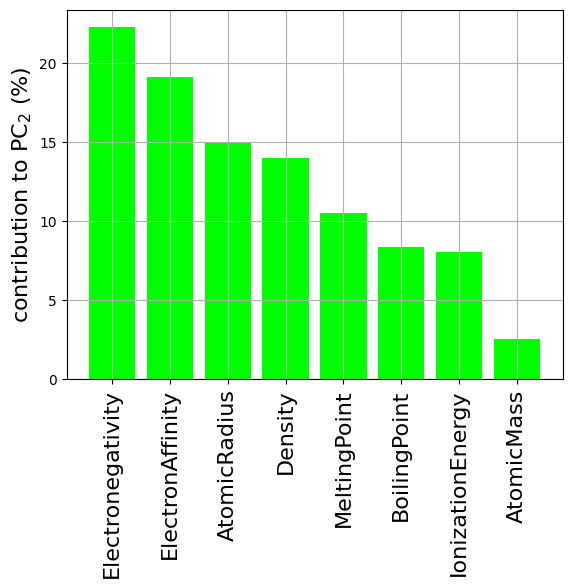

In [10]:
#get the contribution of each feature to PC1
scores = pd.Series(np.abs(pca.components_[0]), index=features) #sqaure each component of the vector
sorted_scores = 100.0*np.abs(scores).sort_values(ascending=False) / np.sum(scores) #sort the scores, normalize by the sum, and multiply by 100 to convert from a fraction to %

fig5,ax5 = plt.subplots()
ax5.bar(sorted_scores.index, sorted_scores.values, color='orange')
ax5.set_xticks(sorted_scores.index)
ax5.set_xticklabels(sorted_scores.index, rotation=90, fontsize=16)
ax5.set_ylabel('contribution to $\\mathrm{PC_{1}}$ (%)', fontsize=16)
ax5.grid()

#get the contribution of each feature to PC2
scores = pd.Series(np.abs(pca.components_[1]), index=features) #sqaure each component of the vector
sorted_scores = 100.0*np.abs(scores).sort_values(ascending=False) / np.sum(scores) #sort the scores, normalize by the sum, and multiply by 100 to convert from a fraction to %

fig6,ax6 = plt.subplots()
ax6.bar(sorted_scores.index, sorted_scores.values, color='lime')
ax6.set_xticks(sorted_scores.index)
ax6.set_xticklabels(sorted_scores.index, rotation=90, fontsize=16)
ax6.set_ylabel('contribution to $\\mathrm{PC_{2}}$ (%)', fontsize=16)
ax6.grid()
plt.show()

# K-Means Clustering

Let's do some clustering with our previous PCA analysis.  We used 8 numerical features from each chemical element to do PCA and then used the top two principcal components to project the data into 2-D.  Let's see what that data looks like without any recoloring.

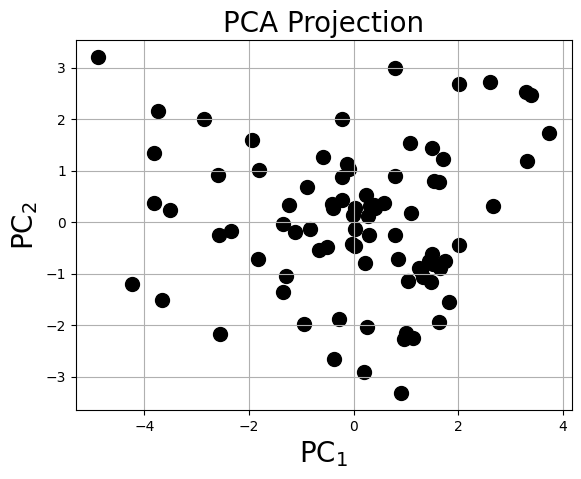

In [11]:
#project the data onto PC1 and PC2
pca = sklearn.decomposition.PCA(n_components=2)
PCs = pca.fit_transform(X_scaled)

#plot projection
fig,ax = plt.subplots()
ax.scatter(PCs[:,0], PCs[:,1], s=100, color='k')

for cat, col in zip(categories, colors): #loop over all of the unique labels
  indices = (elements_df['GroupBlock'] == cat).values #get all of the data points with this label
  ax2.scatter(PCs[indices, 0], PCs[indices, 1], s=100, label=cat, color=col) #plot all of the data points with this label

ax.set_xlabel('$\\mathrm{PC_{1}}$',fontsize=20)
ax.set_ylabel('$\\mathrm{PC_{2}}$',fontsize=20)
ax.set_title('PCA Projection',fontsize=20)
ax.grid()
plt.show()

We'll use k-mean clustering throug <code>sklearn</code>'s <code>KMeans</code> to automatically cluter this data into groups.  We can choose the number of clusters we want with the <code>n_clusters</code> keyword.  After fitting the K-means object, we can access the location of the fitted centers of the clusters with <code>cluster_centers_</code>. Let's try it first with 2 clusters.  

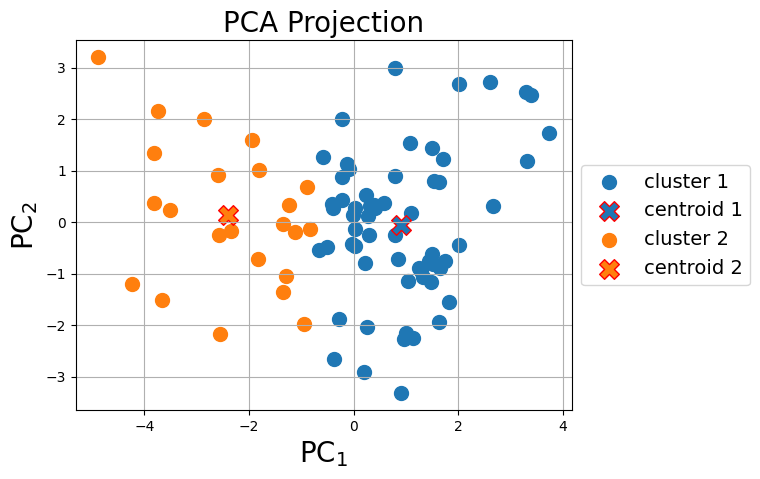

In [12]:
#do K-means clustering on PCA data
N = 2
kmeans = sklearn.cluster.KMeans(n_clusters=N, n_init=100)
clusters = kmeans.fit_predict(PCs)
colors = plt.cm.tab10.colors[:N] #set up a color for each unique label

#plot the PCA colored by our K-means clusters and plot the centers
fig,ax = plt.subplots()
for i in range(N):
  ax.scatter(PCs[clusters==i, 0], PCs[clusters==i, 1], color=colors[i], s=100, label='cluster '+str(i+1))
  ax.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1],  s=200, color=colors[i], marker='X', edgecolor='r', label='centroid '+str(i+1))

ax.set_xlabel('$\\mathrm{PC_{1}}$',fontsize=20)
ax.set_ylabel('$\\mathrm{PC_{2}}$',fontsize=20)
ax.set_title('PCA Projection',fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=14)
ax.grid()
plt.show()

Let's try again with 9 clusters this time.

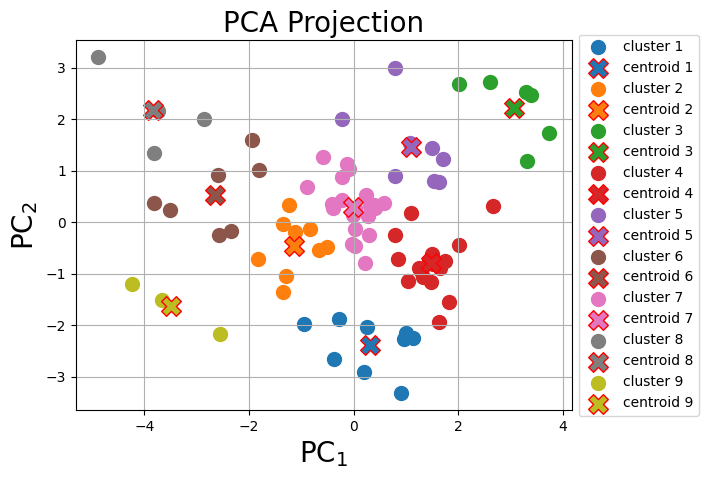

In [13]:
#do K-means clustering on PCA data
N = 9
kmeans = sklearn.cluster.KMeans(n_clusters=N, n_init=100)
clusters = kmeans.fit_predict(PCs)
colors = plt.cm.tab10.colors[:N] #set up a color for each unique label

#plot the PCA colored by our K-means clusters and plot the centers
fig,ax = plt.subplots()
for i in range(N):
  ax.scatter(PCs[clusters==i, 0], PCs[clusters==i, 1], color=colors[i], s=100, label='cluster '+str(i+1))
  ax.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1],  s=200, color=colors[i], marker='X', edgecolor='r', label='centroid '+str(i+1))

ax.set_xlabel('$\\mathrm{PC_{1}}$',fontsize=20)
ax.set_ylabel('$\\mathrm{PC_{2}}$',fontsize=20)
ax.set_title('PCA Projection',fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=10)
ax.grid()
plt.show()

Usually we don't know how many clusters to use.  We can try a range of numbers of clusters and plot the total error for this number.  The data will usually show an "elbow" in the plot of error vs. cluster number.  This elbow gives the point of diminishing returns when adding more clusters and we can choose a number of clusters around there.  There error (or inertia) is the total distance between each data point and its cluster center.

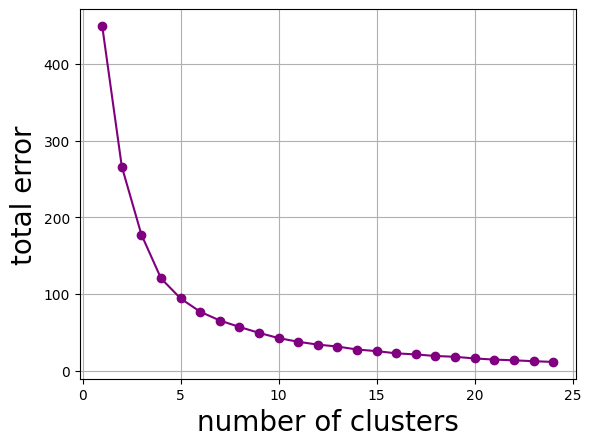

In [14]:
#get a range of cluster number to test
N = range(1,25)

#set up a containter to store the errors
errors = []

#do k-means for each number of clusters
for n in N:
  kmeans = sklearn.cluster.KMeans(n_clusters=n, n_init=100)
  kmeans.fit(PCs)
  errors.append(kmeans.inertia_)

#plot the errors vs. the number of clusters
fig,ax = plt.subplots()
ax.plot(N, errors, 'o-',color='purple')
ax.set_xlabel('number of clusters',fontsize=20)
ax.set_ylabel('total error',fontsize=20)
ax.grid()
plt.show()

Here the optimal number of clusters is somewhere around 5-10.

# K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a classification algorithm.  Let's go back to our PCA where we colored the points by the standard state of the element.  Since there are only two liquids, we'll get rid of them.  We'll use KNN to build a model to classify an element as either a solid or a gas.

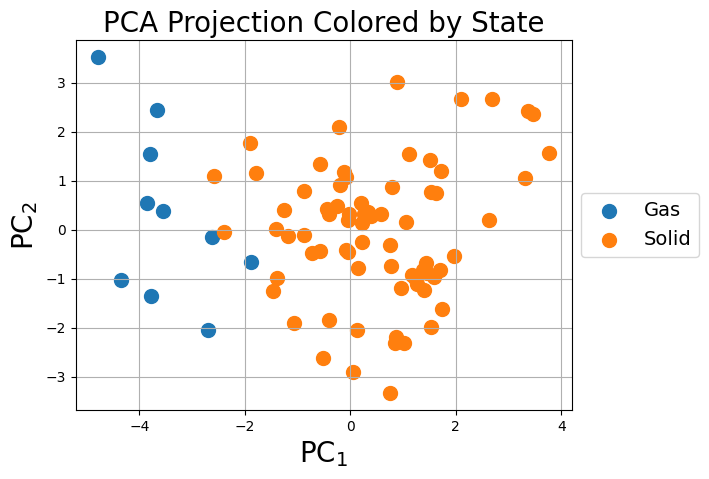

In [15]:
#select features for elements that are solids or gases
filtered_elements_df = elements_df[elements_df['StandardState'] != 'Liquid']
X_sol_gas = filtered_elements_df[features]

#standardize the features- necessary for PCA
scaler = sklearn.preprocessing.StandardScaler()
X_sol_gas_scaled = scaler.fit_transform(X_sol_gas)

#project the data onto PC1 and PC2
pca = sklearn.decomposition.PCA(n_components=2)
PCs = pca.fit_transform(X_sol_gas_scaled)

#plot the projected data colored by the state at standard temperature and pressure
categories = filtered_elements_df['StandardState'].unique() #get the unique labels in the 'StandardState'
colors = plt.cm.tab10.colors[:len(categories)] #set up a color for each unique label

fig,ax = plt.subplots()
for cat, col in zip(categories, colors): #loop over all of the unique labels
    indices = (filtered_elements_df['StandardState'] == cat).values #get all of the data points with this label
    ax.scatter(PCs[indices, 0], PCs[indices, 1], s=100, label=cat, color=col) #plot all of the data points with this label

ax.set_xlabel('$\\mathrm{PC_{1}}$',fontsize=20)
ax.set_ylabel('$\\mathrm{PC_{2}}$',fontsize=20)
ax.set_title('PCA Projection Colored by State',fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=14)
ax.grid()
plt.show()

Now let's use KNN to find the decision boundary between gases and solids.

In [16]:
#function for plotting the results

def plot_decision_boundary(X, y, model):
  #set up a grid for visualization
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  #make predictions on the grid
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  #convert string labels to numerical values for contourf
  Z = np.where(Z == 'Gas', 0, 1)  #Gas= 0, Solid= 1
  Z = Z.reshape(xx.shape)

  #plot decision boundary and data points
  fig,ax = plt.subplots()

  #plot the projected data colored by the state at standard temperature and pressure
  categories = y.unique() #get the unique labels in the 'StandardState'
  colors = plt.cm.tab10.colors[:len(categories)] #set up a color for each unique label

  ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  #decision boundary
  for cat, col in zip(categories, colors): #loop over all of the unique labels
      indices = (y == cat).values #get all of the data points with this label
      ax.scatter(X[indices, 0], X[indices, 1], s=100, label=cat, color=col) #plot all of the data points with this label

  ax.set_xlabel('$\\mathrm{PC_{1}}$',fontsize=20)
  ax.set_ylabel('$\\mathrm{PC_{2}}$',fontsize=20)
  ax.set_title('PCA Projection Colored by State',fontsize=20)
  ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=14)
  ax.grid()
  plt.show()

Let's try with 1-nearest neighbor first.

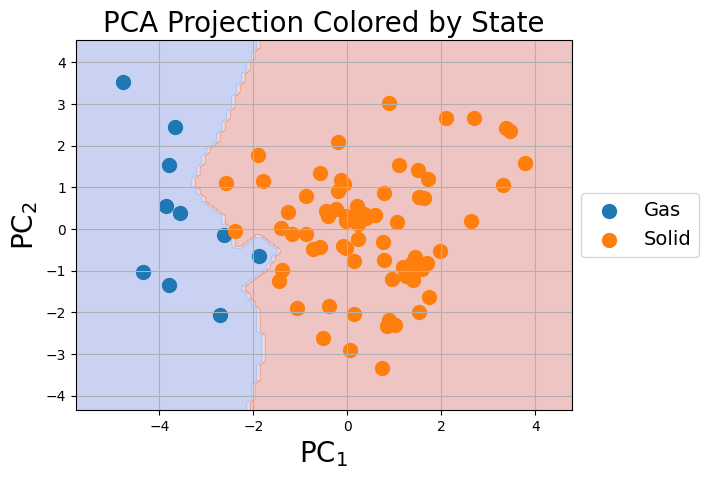

In [17]:
#our features will be PC1 and PC2
X_train = PCs

#our labels will be the state
y_train = filtered_elements_df['StandardState']

#set up and train the KNN model
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#plot the decision boundary
plot_decision_boundary(X_train, y_train, knn)

How about 2-nearest neighbors.

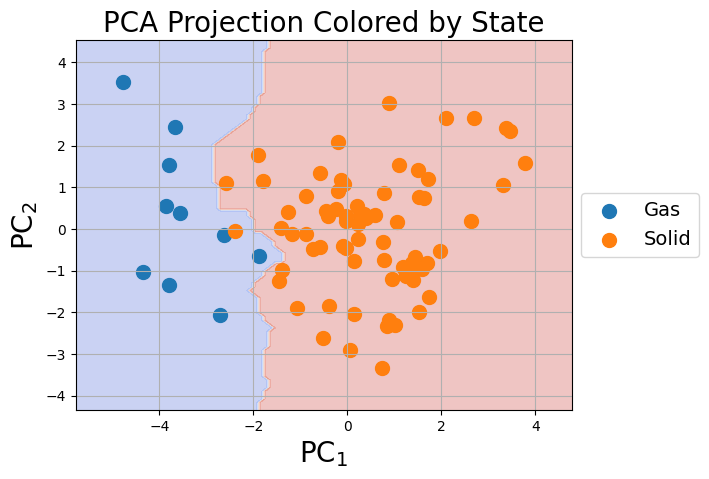

In [18]:
#set up and train the KNN model
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

#plot the decision boundary
plot_decision_boundary(X_train, y_train, knn)

And now 5-nearest neighbors.

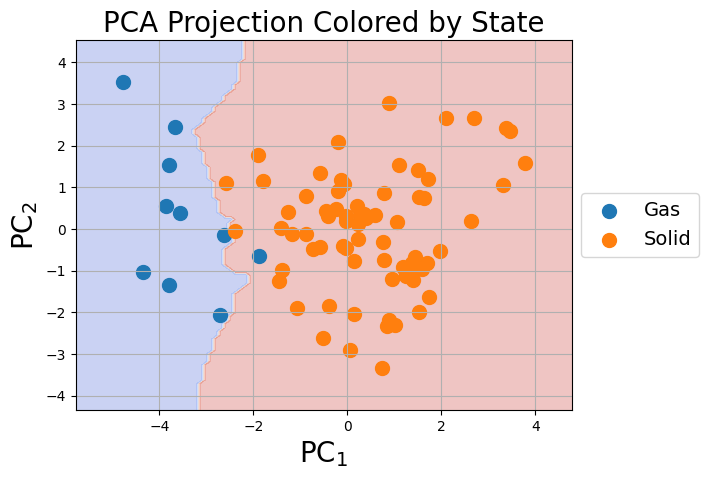

In [19]:
#set up and train the KNN model
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#plot the decision boundary
plot_decision_boundary(X_train, y_train, knn)

And now 10-nearest neighbors.

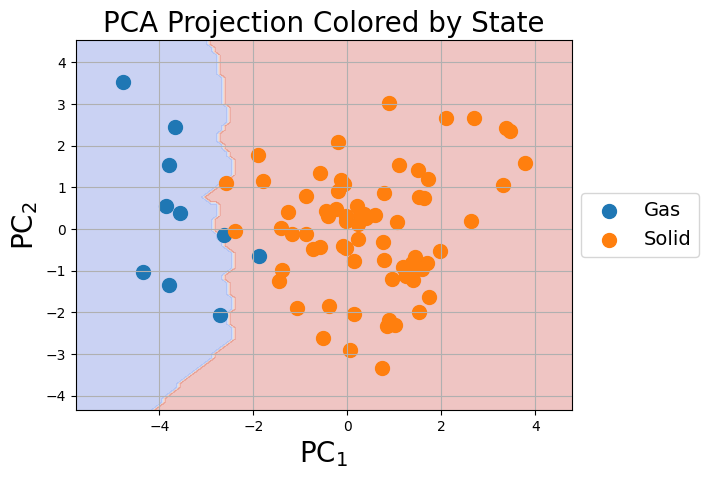

In [20]:
#set up and train the KNN model
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#plot the decision boundary
plot_decision_boundary(X_train, y_train, knn)

Let's try 25 neighbors.

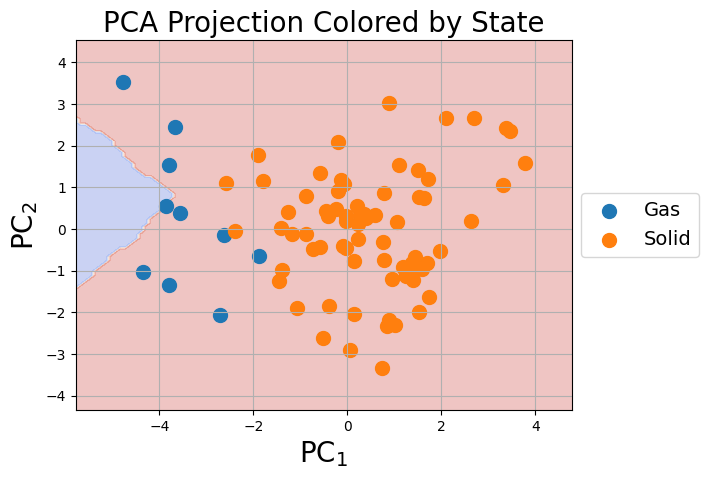

In [21]:
#set up and train the KNN model
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

#plot the decision boundary
plot_decision_boundary(X_train, y_train, knn)

Because there are way more solid data points than gas data points, their votes when we look at a large number of neighbors will wash out the votes of the gases, even when we are close to the gas side.  If you wanted to, you could call this the "tyranny of the majority."  We could overcome this by weighting the votes by the distance from the test point.

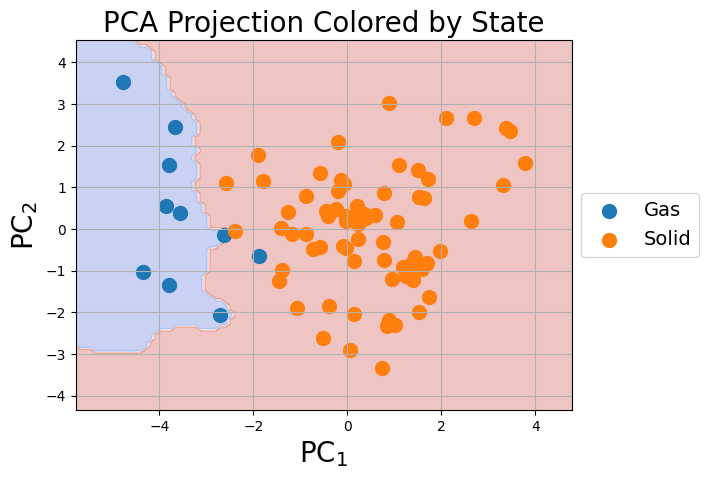

In [22]:
#set up and train the KNN model
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=20,weights='distance')
knn.fit(X_train, y_train)

#plot the decision boundary
plot_decision_boundary(X_train, y_train, knn)

The decision boundary changes with the number of neighbors.  We can intrepret this as a bias-variance tradeoff.  

With a low number of neighbors, we are essentially overfitting and we have a large variance.  Changing any one point near the boundary will drastically change the boundary.  And the boundary looks jagged- it is highly variable.

With a large number of neighbors, we are essentially applying a large regularization and we have a large bias.  The boundary is a lot smoother and less ragged.

The best way to characterize how well we're doing is with validation.  Let's use leave-one-out cross validation with 10 folds to figure out what the optimal number of neighbors is.

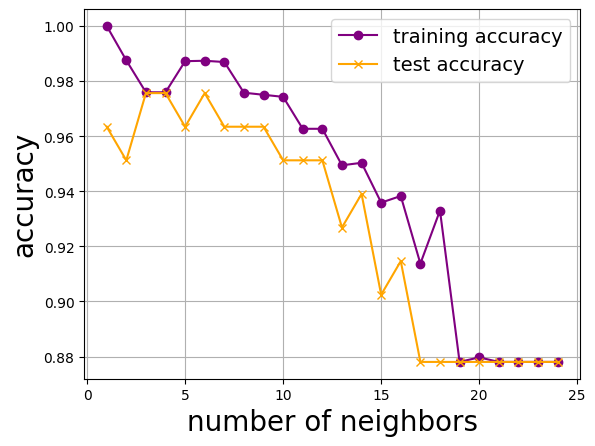

In [23]:
#choose a range of neighbor values to look at
N = range(1, 25)

#containers for storing test and training accuracy
training_accuracy = []
test_accuracy = []

#test each number of neighbors
for n in N:
  #set up the model and k-fold cross validation
  loocv = sklearn.model_selection.LeaveOneOut()
  knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n)

  #this will apply the cross validation automatically and put the results in 'cv_results'
  cv_results = sklearn.model_selection.cross_validate(knn, X_train, y_train, cv=loocv, scoring='accuracy', return_train_score=True) #for classification we can look athe accuracy as a score

  training_accuracy.append(np.mean(cv_results['train_score']))
  test_accuracy.append(np.mean(cv_results['test_score']))

#plot the training and test accuracy estimated from 10-fold cross validation for each number of neighbors
fig,ax = plt.subplots()
ax.plot(N, training_accuracy, 'o-',color='purple', label='training accuracy')
ax.plot(N, test_accuracy, 'x-',color='orange', label='test accuracy')
ax.set_xlabel('number of neighbors',fontsize=20)
ax.set_ylabel('accuracy',fontsize=20)
ax.legend(fontsize=14)
ax.grid()
plt.show()

Based on the test accuray, 3-6 neighbors is optimal.